In [21]:
library(anndata)
library(Signac)
library(Seurat)
library(anndata)
library(ggplot2)
library(tidyverse)
library(Signac)
library(Seurat)
#library(EnsDb.Mmusculus.v102)
library(BSgenome.Mmusculus.UCSC.mm10)
library(EnsDb.Mmusculus.v102)
#library(pastecs)
library(stringr)

ERROR: Error in library(EnsDb.Mmusculus.v102): es gibt kein Paket namens 'EnsDb.Mmusculus.v102'


In [7]:
R.version

               _                           
platform       x86_64-apple-darwin13.4.0   
arch           x86_64                      
os             darwin13.4.0                
system         x86_64, darwin13.4.0        
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

In [102]:
devtools::install_github("GreenleafLab/chromVARmotifs")

S4Vectors    (0.32.3    -> 0.32.4   ) [CRAN]
matrixStats  (0.62.0    -> 0.63.0   ) [CRAN]
yaml         (2.3.5     -> 2.3.6    ) [CRAN]
crayon       (1.5.1     -> 1.5.2    ) [CRAN]
RCurl        (1.98-1.7  -> 1.98-1.9 ) [CRAN]
GenomeInfoDb (1.30.0    -> 1.30.1   ) [CRAN]
XML          (3.99-0.10 -> 3.99-0.13) [CRAN]
lifecycle    (1.0.1     -> 1.0.3    ) [CRAN]
cli          (3.3.0     -> 3.4.1    ) [CRAN]
vctrs        (0.4.1     -> 0.5.1    ) [CRAN]
rlang        (1.0.4     -> 1.0.6    ) [CRAN]
bit          (4.0.4     -> 4.0.5    ) [CRAN]
sys          (3.4       -> 3.4.1    ) [CRAN]
tidyselect   (1.1.2     -> 1.2.0    ) [CRAN]
pillar       (1.8.0     -> 1.8.1    ) [CRAN]
viridisLite  (0.4.0     -> 0.4.1    ) [CRAN]
openssl      (2.0.2     -> 2.0.5    ) [CRAN]
jsonlite     (1.8.0     -> 1.8.4    ) [CRAN]
curl         (4.3.2     -> 4.3.3    ) [CRAN]
stringr      (1.4.0     -> 1.5.0    ) [CRAN]
plyr         (1.8.7     -> 1.8.8    ) [CRAN]
cpp11        (0.4.2     -> 0.4.3    ) [CRAN]
vroom     

Installing 33 packages: S4Vectors, matrixStats, yaml, crayon, RCurl, GenomeInfoDb, XML, lifecycle, cli, vctrs, rlang, bit, sys, tidyselect, pillar, viridisLite, openssl, jsonlite, curl, stringr, plyr, cpp11, vroom, hms, scales, isoband, gtable, png, httr, ggplot2, readr, RSQLite, gtools

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



✔  checking for file ‘/private/var/folders/nv/23yzkl2x1gd0mhpjqgpm0f4hqc8gvy/T/RtmpboCYTA/remotesea96727bd8/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’
─  preparing ‘chromVARmotifs’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘chromVARmotifs_0.2.0.tar.gz’
   Warnung in sprintf(gettext(fmt, domain = domain), ...)
     one argument not used by format 'invalid uid value replaced by that for user 'nobody''
   Warnung: invalid uid value replaced by that for user 'nobody'
   Warnung in sprintf(gettext(fmt, domain = domain), ...)
     one argument not used by format 'invalid gid value replaced by that for user 'nobody''
   Warnung: invalid gid value replaced by that for user 'nobody'
   


In [104]:
library("chromVARmotifs")

In [146]:
data("human_pwms_v1")
data("human_pwms_v2")

In [147]:
sout <- sapply(strsplit(names(mouse_pwms_v1), split = "_"), function(s) c(s[3]))
mouse_pwms_v1 <- mouse_pwms_v1[match(unique(sout), sout)]

In [149]:
names(mouse_pwms_v1)

[1] "ENSMUSG00000021359_LINE1_Tcfap2a_D_N1"              
  [2] "ENSMUSG00000025927_LINE5_Tcfap2b_D"                 
  [3] "ENSMUSG00000028640_LINE6_Tcfap2c_D"                 
  [4] "ENSMUSG00000042477_LINE7_Tcfap2e_D"                 
  [5] "ENSMUSG00000042596_LINE8_Tcfap2d_I"                 
  [6] "ENSMUSG00000004661_LINE10_Arid3b_D"                 
  [7] "ENSMUSG00000019564_LINE13_Arid3a_D_N3"              
  [8] "ENSMUSG00000019947_LINE15_Arid5b_D"                 
  [9] "ENSMUSG00000037447_LINE18_Arid5a_D"                 
 [10] "ENSMUSG00000066224_LINE24_Arid3c_I"                 
 [11] "ENSMUSG00000033237_LINE27_Arid2_I"                  
 [12] "ENSMUSG00000024548_LINE28_Setbp1_D"                 
 [13] "ENSMUSG00000026491_LINE29_Ahctf1_D"                 
 [14] "ENSMUSG00000056758_LINE31_Hmga2_D"                  
 [15] "ENSMUSG00000058318_LINE32_Phf21a_D"                 
 [16] "ENSMUSG00000071262_LINE33_Zfp957_I"                 
 [17] "ENSMUSG00000000134_LINE36_Tcfe3_D"                  
 [18] "ENSMUSG00000000282_LINE38_Mnt_D"                    
 [19] "ENSMUSG00000001988_LINE41_Npas1_I"                  
 [20] "ENSMUSG00000005718_LINE44_Tcfap4_D"                 
 [21] "ENSMUSG00000007805_LINE47_Twist2_D"                 
 [22] "ENSMUSG00000007872_LINE48_Id3_I"                    
 [23] "ENSMUSG00000009248_LINE50_Ascl2_D_N2"               
 [24] "ENSMUSG00000009471_LINE51_Myod1_D"                  
 [25] "ENSMUSG00000015522_LINE52_Arnt_D_N2"                
 [26] "ENSMUSG00000015709_LINE54_Arnt2_D"                  
 [27] "ENSMUSG00000017801_LINE55_Mlx_D_N3"                 
 [28] "ENSMUSG00000019256_LINE58_Ahr_I"                    
 [29] "ENSMUSG00000019789_LINE59_Hey2_D"                   
 [30] "ENSMUSG00000019913_LINE60_Sim1_I"                   
 [31] "ENSMUSG00000020167_LINE64_Tcf3_D_N3"                
 [32] "ENSMUSG00000020538_LINE66_Srebf1_D_N2"              
 [33] "ENSMUSG00000020644_LINE69_Id2_D"                    
 [34] "ENSMUSG00000021010_LINE71_Npas3_I"                  
 [35] "ENSMUSG00000021379_LINE72_Id4_I"                    
 [36] "ENSMUSG00000021575_LINE74_Ahrr_I"                   
 [37] "ENSMUSG00000022346_LINE75_Myc_D"                    
 [38] "ENSMUSG00000022463_LINE76_Srebf2_D"                 
 [39] "ENSMUSG00000022528_LINE77_Hes1_D"                   
 [40] "ENSMUSG00000023781_LINE78_Hes7_D"                   
 [41] "ENSMUSG00000023990_LINE80_Tcfeb_D"                  
 [42] "ENSMUSG00000025128_LINE82_Bhlhe22_D"                
 [43] "ENSMUSG00000025930_LINE83_Msc_D"                    
 [44] "ENSMUSG00000026077_LINE84_Npas2_D"                  
 [45] "ENSMUSG00000026459_LINE85_Myog_D"                   
 [46] "ENSMUSG00000026641_LINE86_Usf1_D"                   
 [47] "ENSMUSG00000026735_LINE87_Ptf1a_I"                  
 [48] "ENSMUSG00000027794_LINE89_Sohlh2_D"                 
 [49] "ENSMUSG00000027967_LINE90_Neurog2_I"                
 [50] "ENSMUSG00000028654_LINE92_Mycl1_I"                  
 [51] "ENSMUSG00000028940_LINE94_Hes2_D"                   
 [52] "ENSMUSG00000029238_LINE96_Clock_D"                  
 [53] "ENSMUSG00000029553_LINE98_Tcfec_D_N2"               
 [54] "ENSMUSG00000030001_LINE99_Figla_D"                  
 [55] "ENSMUSG00000030103_LINE100_Bhlhe40_D_N5"            
 [56] "ENSMUSG00000030256_LINE106_Bhlhe41_D"               
 [57] "ENSMUSG00000030543_LINE107_Mesp2_I"                 
 [58] "ENSMUSG00000030544_LINE108_Mesp1_I"                 
 [59] "ENSMUSG00000032228_LINE109_Tcf12_D_N1"              
 [60] "ENSMUSG00000032744_LINE111_Heyl_I"                  
 [61] "ENSMUSG00000034161_LINE113_Scx_I"                   
 [62] "ENSMUSG00000035158_LINE115_Mitf_D"                  
 [63] "ENSMUSG00000035923_LINE117_Myf6_D_N1"               
 [64] "ENSMUSG00000036816_LINE120_Atoh7_I"                 
 [65] "ENSMUSG00000037169_LINE121_Mycn_D"                  
 [66] "ENSMUSG00000037335_LINE123_Hand1_I"                 
 [67] "ENSMUSG00000037621_LINE124_Atoh8_I"

In [8]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("JASPAR2020", version = "3.14")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Installing package(s) 'JASPAR2020'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'BiocManager', 'GenomeInfoDb', 'Hmisc', 'IRkernel', 'MASS',
  'Matrix', 'RCurl', 'RSQLite', 'RcppAnnoy', 'RcppArmadillo', 'RcppEigen',
  'S4Vectors', 'Seurat', 'SeuratObject', 'Signac', 'XML', 'anndata', 'bit',
  'boot', 'brew', 'broom', 'bslib', 'callr', 'caret', 'cli', 'cluster',
  'commonmark', 'cpp11', 'crayon', 'crul', 'curl', 'data.table', 'desc',
  'devtools', 'digest', 'dplyr', 'dtplyr', 'e1071', 'evaluate', 'fontawesome',
  'forcats', 'foreign', 'future', 'future.apply', 'gargle', 'gert', 'ggforce',
  'ggplot2', 'ggrepel', 'ggridges', 'gh', 'gitcreds', 'glmnet', 'globals',
  'googlesheets4', 'gtable', 'gtools', 'haven

In [9]:
library(JASPAR2020)


In [11]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("TFBSTools")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Installing package(s) 'TFBSTools'

installiere auch Abhängigkeiten ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘poweRlaw’, ‘annotate’, ‘GO.db’, ‘R.utils’, ‘CNEr’, ‘DirichletMultinomial’, ‘seqLogo’, ‘TFMPvalue’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'BiocManager', 'GenomeInfoDb', 'Hmisc', 'IRkernel', 'MASS',
  'Matrix', 'RCurl', 'RSQLite', 'RcppAnnoy', 'RcppArmadillo', 'RcppEigen',
  'S4Vectors', 'Seurat', 'SeuratObject', 'Signac', 'XML', 'anndata', 'bit',
  'boot', 'brew', 'broom', 'bslib', 'callr', 'caret', 'cli', 'cluster',
  'commonmark', 'cpp11', 'crayon', 'crul', 'curl', 'data.table', 'desc',
  'devtools', 'digest', 'dplyr', 'dtplyr', 'e1071', 'evaluate', 'fontawesome',
  'forcats', 'foreign', 'future', 

In [16]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("motifmatchr")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Installing package(s) 'motifmatchr'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'BiocManager', 'GenomeInfoDb', 'Hmisc', 'IRkernel', 'MASS',
  'Matrix', 'RCurl', 'RSQLite', 'RcppAnnoy', 'RcppArmadillo', 'RcppEigen',
  'S4Vectors', 'Seurat', 'SeuratObject', 'Signac', 'XML', 'anndata', 'bit',
  'boot', 'brew', 'broom', 'bslib', 'callr', 'caret', 'cli', 'cluster',
  'commonmark', 'cpp11', 'crayon', 'crul', 'curl', 'data.table', 'desc',
  'devtools', 'digest', 'dplyr', 'dtplyr', 'e1071', 'evaluate', 'fontawesome',
  'forcats', 'foreign', 'future', 'future.apply', 'gargle', 'gert', 'ggforce',
  'ggplot2', 'ggrepel', 'ggridges', 'gh', 'gitcreds', 'glmnet', 'globals',
  'googlesheets4', 'gtable', 'gtools', 'have

In [13]:
library("TFBSTools")

In [2]:
seurat <- readRDS("/Users/dominik.klein/data/seurat_new_annotations.rds")

In [57]:
# Get a list of motif position frequency matrices from the JASPAR database
pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)



In [23]:
BSgenome.Mmusculus.UCSC.mm10.renamed <- renameSeqlevels(BSgenome.Mmusculus.UCSC.mm10, value = str_replace(str_replace(seqnames(BSgenome.Mmusculus.UCSC.mm10), pattern = "chr", replacement = ""), pattern = "M", replacement = "MT"))

In [24]:
# add motif information
seurat <- AddMotifs(
  object = seurat,
  genome = BSgenome.Mmusculus.UCSC.mm10.renamed,
  pfm = pfm
)

Building motif matrix

Finding motif positions

Creating Motif object



In [28]:
Idents(seurat) <- seurat@meta.data[["Fev_delta_refinement"]]

In [90]:
da_peaks <- FindMarkers(
  object = seurat,
  ident.1 = 'Delta',
  ident.2 = 'Epsilon',
  only.pos = TRUE,
  test.use = 'LR',
  min.pct = 0.05,
  latent.vars = 'nCount_peaks',
)

In [91]:
top.da.peak <- rownames(da_peaks[da_peaks$p_val < 0.005, ])


In [92]:
# test enrichment
enriched.motifs <- FindMotifs(
  object = seurat,
  features = top.da.peak
)

Selecting background regions to match input sequence characteristics

Matching GC.percent distribution

Testing motif enrichment in 641 regions



In [136]:
mouse_pwms_v2[[1]]

An object of class PWMatrix
ID: ENSMUSG00000021359_LINE1_Tcfap2a_D_N1
Name: Tcfap2a
Matrix Class: Unknown
strand: *
Pseudocounts: 
Tags: 
$ensembl
[1] "ENSMUSG00000021359"

Background: 
   A    C    G    T 
0.25 0.25 0.25 0.25 
Matrix: 
        [,1]       [,2]      [,3]       [,4]       [,5]       [,6]         [,7]
A -0.1219625 -0.7672707 -2.687741 -3.4203130 -1.5598614 -0.6069550  0.529959786
C  0.2859512 -0.2459317  1.351939  1.2485377  0.4014825  0.2879914 -0.006745609
G -0.8521397  0.9654855 -3.428257 -3.4338333 -0.2585069  0.2684610 -0.084148958
T  0.3054898 -2.0582005 -3.363604 -0.7989697  0.4210714 -0.2066599 -0.945295819
        [,8]      [,9]      [,10]
A  0.1823991 -1.408227 -0.9159324
C -2.0637877 -3.421003  0.3260437
G  0.9384274  1.304651  0.5416141
T -2.1457873 -3.314809 -0.7019824

In [101]:
enriched.motifs

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
MA1608.1,MA1608.1,103,2588,16.068643,6.4700,2.483561,1.216877e-17,Isl1,9.077904e-15
MA0710.1,MA0710.1,88,2128,13.728549,5.3200,2.580554,4.291920e-16,NOTO,1.600886e-13
MA0644.1,MA0644.1,96,2567,14.976599,6.4175,2.333712,8.859406e-15,ESX1,2.203039e-12
MA0888.1,MA0888.1,71,1650,11.076443,4.1250,2.685198,5.999357e-14,EVX2,1.010036e-11
MA0642.1,MA0642.1,69,1579,10.764431,3.9475,2.726898,6.769678e-14,EN2,1.010036e-11
MA0699.1,MA0699.1,92,2520,14.352574,6.3000,2.278186,1.403491e-13,LBX2,1.627045e-11
MA1500.1,MA1500.1,89,2399,13.884555,5.9975,2.315057,1.526718e-13,HOXB6,1.627045e-11
MA1497.1,MA1497.1,90,2454,14.040562,6.1350,2.288600,2.085329e-13,HOXA6,1.688478e-11
MA0894.1,MA0894.1,81,2089,12.636505,5.2225,2.419628,2.256578e-13,HESX1,1.688478e-11


Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


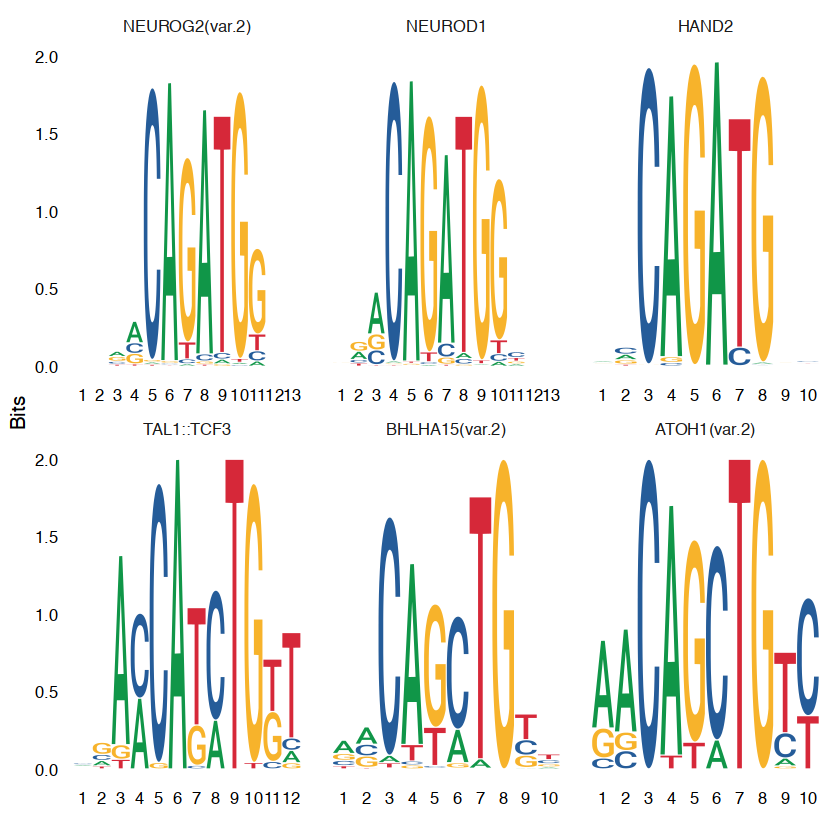

In [35]:
MotifPlot(
  object = seurat,
  motifs = head(rownames(enriched.motifs))
)

In [37]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("chromVAR")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.3 (2022-03-10)

Installing package(s) 'chromVAR'

installiere auch Abhängigkeiten 'nabor', 'DT'


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'BiocManager', 'GenomeInfoDb', 'Hmisc', 'IRkernel', 'MASS',
  'Matrix', 'RCurl', 'RSQLite', 'RcppAnnoy', 'RcppArmadillo', 'RcppEigen',
  'S4Vectors', 'Seurat', 'SeuratObject', 'Signac', 'XML', 'anndata', 'bit',
  'boot', 'brew', 'broom', 'bslib', 'callr', 'caret', 'cli', 'cluster',
  'commonmark', 'cpp11', 'crayon', 'crul', 'curl', 'data.table', 'desc',
  'devtools', 'digest', 'dplyr', 'dtplyr', 'e1071', 'evaluate', 'fontawesome',
  'forcats', 'foreign', 'future', 'future.apply', 'gargle', 'gert', 'ggforce',
  'ggplot2', 'ggrepel', 'ggridges', 'gh', 'gitcreds', 'glmnet', 'globals',

In [38]:
library("chromVAR")

In [39]:
seurat <- RunChromVAR(
  object = seurat,
  genome = BSgenome.Mmusculus.UCSC.mm10.renamed
)



Computing GC bias per region

Selecting background regions

Computing deviations from background

Constructing chromVAR assay



In [127]:
DefaultAssay(seurat) <- 'chromvar'

In [128]:
seurat

An object of class Seurat 
476075 features across 16918 samples within 4 assays 
Active assay: chromvar (746 features, 0 variable features)
 3 other assays present: RNA, ATAC, ATAC_merged
 1 dimensional reduction calculated: lsi

In [46]:


# look at the activity of Mef2c
p2 <- FeaturePlot(
  object = seurat,
  features = "MA1642.1",
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.1,
  reductio= "UMAP"
)
p1 + p2

ERROR: Error: Cannot find 'UMAP' in this Seurat object


In [155]:
seurat[["chromvar"]]@data

,E14-5_AAACAGCCAACAGCCT-1,E14-5_AAACAGCCAACCCTCC-1,E14-5_AAACAGCCACCTGTAA-1,E14-5_AAACAGCCACTAAGCC-1,E14-5_AAACAGCCAGGATAAC-1,E14-5_AAACAGCCATAAAGCA-1,E14-5_AAACATGCAAGGTAAC-1,E14-5_AAACATGCAAGGTGGC-1,E14-5_AAACATGCACTAGGTC-1,E14-5_AAACATGCAGCATTAT-1,⋯,E15-5_TTTGTGTTCACGAATC-1,E15-5_TTTGTGTTCGAGCTAT-1,E15-5_TTTGTGTTCGATCAGT-1,E15-5_TTTGTGTTCGCTATGG-1,E15-5_TTTGTGTTCTCAATGA-1,E15-5_TTTGTGTTCTTGTTCG-1,E15-5_TTTGTTGGTATTGAGT-1,E15-5_TTTGTTGGTCCTAAGA-1,E15-5_TTTGTTGGTTAACAGT-1,E15-5_TTTGTTGGTTGTTGCT-1
MA0004.1,-0.67707497,0.43309670,0.63509793,-1.89774407,-0.86872779,-0.61923982,0.57568201,-1.4583483,0.32323995,0.823130819,⋯,1.06329640,0.01606206,2.43139579,1.470340355,0.65327400,-2.04180331,-2.04592876,0.51657197,-0.62278296,-0.080161449
MA0006.1,0.21705849,1.16858842,-2.44768163,-0.80415368,-0.47529135,-1.48967411,-0.68497843,-0.0627379,1.67166882,0.279706136,⋯,0.64524580,0.98396313,0.57635715,-0.060093312,0.13871894,-0.04575263,1.45467536,1.21066738,-0.55585296,0.527381827
MA0019.1,0.04771466,-0.36435150,0.26184733,-1.58466981,1.54581093,0.52643707,-0.97108554,-1.7191670,0.47706826,-0.424221834,⋯,-1.42791402,0.16132727,-1.52838567,0.213214550,-0.01560617,0.93576571,-0.06989341,-0.67380933,-0.22649216,-0.317039801
MA0029.1,0.40176650,0.40286599,-1.12292553,-0.61405917,-0.38574547,0.93679427,0.22982053,-0.2268574,-0.78046717,-1.463069922,⋯,0.96174009,-2.22571012,0.77160131,-0.448048382,-0.79955612,2.60123673,-1.14575461,0.99006543,-0.79594652,-0.576542845
MA0030.1,-0.83481368,2.74747393,-1.13168460,2.08548854,-1.23005695,2.66479868,0.94130079,1.3369173,-1.32286613,1.503146388,⋯,1.49495529,-0.45145912,-1.45047934,-0.366774356,2.06176511,-2.24325614,-1.30786106,-2.62719013,-1.63488935,1.398944983
MA0031.1,-0.35981312,4.06562215,-1.03084127,0.38123447,-0.16115098,2.40037013,1.68176781,-1.2814213,-0.14207100,2.232910869,⋯,1.54866997,0.79927259,0.59592902,1.099983710,1.72004682,-3.22760221,-1.67862005,-1.14659714,-0.83387404,0.798418446
MA0040.1,-1.58781792,2.47792990,-0.52468567,-0.09141400,-2.04879780,1.06428555,0.62785314,-1.0385577,-1.45065300,-0.009893747,⋯,0.44340358,0.75175873,-0.85291478,0.205759574,1.05108404,-0.41587367,-1.14926811,-2.42631948,-0.22777588,0.726087450
MA0041.1,-1.64000502,0.86411004,0.42677977,1.14918389,-0.63379231,0.70071889,-1.77925287,-1.0821578,1.35908057,0.133077804,⋯,-0.68410842,1.83697403,-0.10241833,-0.691872320,-0.38539014,-2.11610044,-1.13843786,-0.57023408,0.12430076,0.364523357
MA0051.1,-1.40528419,-0.64377682,-0.43302832,1.74028739,-0.50822289,0.18172655,1.14944660,-0.4515174,1.01517296,0.270387527,⋯,1.87145535,-1.28869552,-1.27161381,-0.754019602,-0.40285061,0.67471948,0.97104224,0.85183751,-0.21638196,-0.197728204
MA0057.1,-0.81756729,1.49132843,1.72712037,-1.07007345,1.93790216,1.50797136,0.71567492,2.2999692,-1.09196349,-0.129667615,⋯,-0.23227489,-1.24986225,0.50834725,0.305468487,-0.70910987,0.30708585,-0.71221497,-1.16710051,0.70813756,-1.643794114


In [126]:
seurat

An object of class Seurat 
476075 features across 16918 samples within 4 assays 
Active assay: ATAC_merged (228259 features, 228259 variable features)
 3 other assays present: RNA, ATAC, chromvar
 1 dimensional reduction calculated: lsi